# Explanatory Analysis of a bike sharing service

In this notebook I analyze the data set of a bike sharing service. The data set contains information about the trips recorded in february 2019. It shows at which stations it started, how long the trip was and information about the user like age, user type and gender.

As part of this project it is necessary to come up with interesting questions that can be answered. From the perspective of a service provider it is vital to ensure a high quality service. Therefore knowledge about how the service is used needs to be generated. For this purpose I will answer the following questions:

* Are there stations that are highly frequented?
* Is there a pattern starting and ending points of trips regarding to some stations?
* Is there a usage pattern depending on the day of the week or the hour of the day?
* Are some stations highly connected to each other?
* Can user characteristica be identified that drive a special usage behavior?

With this questions in mind, giving the right answers a bike sharing service could improve the overall user experience by allocating resources (bikes) efficiently to the stations and identfiying bottlenecks. Also a better user understanding can lead to a more personalized product experience that in the end improves the companies performance.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# loading the dataframes
df = pd.read_csv('main_data.csv')
df_customers = pd.read_csv('df_customers.csv')
df_stations_overview = pd.read_csv('df_stations_overview.csv')
df_stations_all = pd.read_csv('df_stations_all.csv')

In [3]:
df['start_time'] =  pd.to_datetime(df['start_time'])
df['end_time'] =  pd.to_datetime(df['end_time'])
#df.info()

## Getting insights about the users and usage behavior
Some basic user information

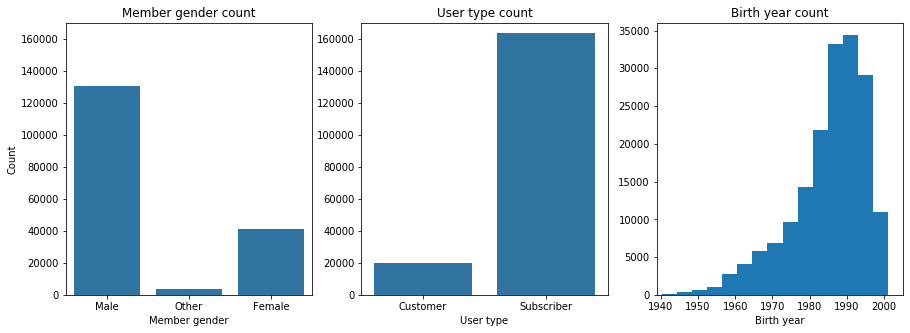

In [13]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [15, 5])

plt.subplot(1, 3, 1) 
# getting to know the members gender
sb.countplot(data=df,x='member_gender',color=base_color);
plt.ylim(0,170000);
plt.xlabel('Member gender')
plt.ylabel('Count')
plt.title('Member gender count')

# getting to know the user type
plt.subplot(1, 3, 2) 
sb.countplot(data=df,x='user_type',color=base_color);
plt.ylim(0,170000);
plt.xlabel('User type')
plt.ylabel('')
plt.title('User type count')

# getting to know the members age
plt.subplot(1, 3, 3) 
plt.hist(data = df, x = 'member_birth_year', bins = 25);
plt.ylim(0,36000);
plt.xlim(1939,2005);
plt.xlabel('Birth year')
plt.ylabel('')
plt.title('Birth year count');

The data shows that there a lot more men than female using the service as well as a lot more subscriber than customers. Also the main user base is born between 1980 and 2000 and therefore between 20 and 40 years old.

Is there additional information about the user behavior and use of the bike sharing service?

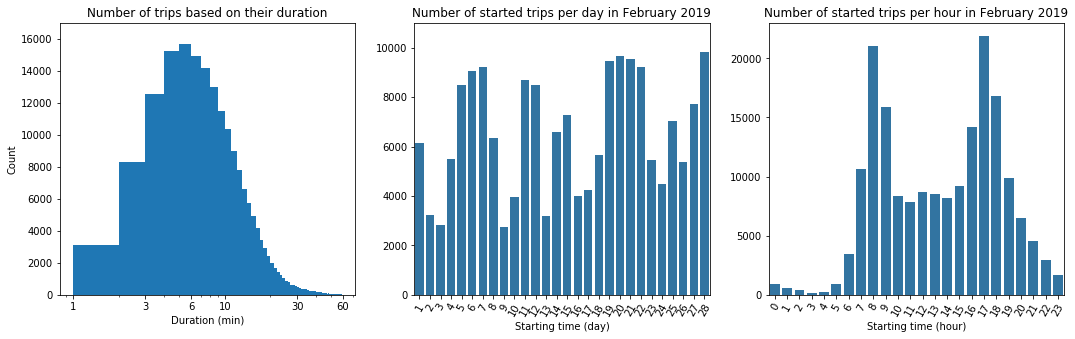

In [5]:
plt.figure(figsize = [18, 5]) 
# Get to know the duration data

plt.subplot(1, 3, 1) 

ticks = [1,3,6,10,30,60]
labels = ['{}'.format(v) for v in ticks]
bins = np.arange(1, 60, 1)
plt.hist(data = df, x = 'duration_min', bins = bins);
plt.xscale('log');
plt.xlabel('Duration (min)')
plt.title('Number of trips based on their duration')
plt.xticks(ticks, labels);
plt.ylabel('Count');
plt.ylim(0,17000);

plt.subplot(1, 3, 2)
# check the day of the trips
sb.countplot(data=df, x=df.start_time.dt.day, color=base_color);
plt.xlabel('Starting time (day)')
plt.title('Number of started trips per day in February 2019')
plt.xticks(rotation=60);
plt.ylabel('');
plt.ylim(0,11000);

plt.subplot(1, 3, 3)
# check the hour of the trips
sb.countplot(data=df, x=df.start_time.dt.hour, color=base_color);
plt.xlabel('Starting time (hour)')
plt.title('Number of started trips per hour in February 2019')
plt.xticks(rotation=60);
plt.ylabel('');
plt.ylim(0,23000);

The data shows that most trips take a duration between 2 and 20 minutes. On a daily basis the usage behavior follows a pattern where on the weekend the number of trips is lower than during the week. During a day most trips take place in the morning and in the afternoon.

Is there a different user behavior based on user characteristics?

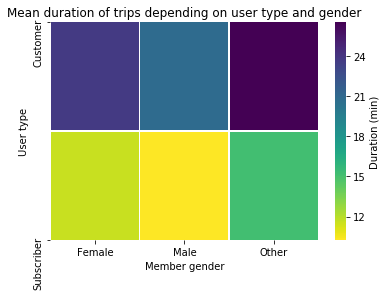

In [6]:
counts = df.groupby(['user_type','member_gender']).duration_min.mean()
counts = counts.reset_index(name='duration_min')
counts = counts.pivot(index = 'user_type', columns = 'member_gender', values = 'duration_min')
sb.heatmap(counts, linewidths=.5, cmap='viridis_r', cbar_kws={'label': 'Duration (min)'}, yticklabels=True);
plt.title('Mean duration of trips depending on user type and gender');
plt.ylabel('User type');
plt.xlabel('Member gender');

It can be seen that in the mean customers take almost double the time than subscribers do.

## Getting insights about the bike sharing stations
How are starting and endpoint stations connected?

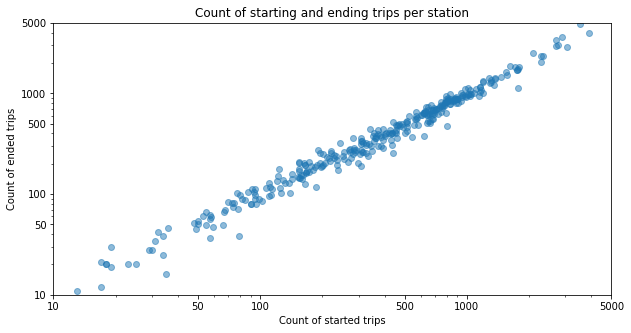

In [7]:
plt.figure(figsize = [10, 5])
# How are starting and endpoint stations connected?
ticks = [10,50,100,500,1000,5000]
labels = ['{}'.format(v) for v in ticks]

plt.scatter(data = df_stations_overview, x = 'start_counts', y = 'end_counts', alpha= 1/2);
plt.xlabel('Count of started trips');
plt.ylabel('Count of ended trips');
plt.title('Count of starting and ending trips per station');

plt.xscale('log');
plt.xticks(ticks, labels);
plt.yscale('log');
plt.yticks(ticks, labels);
plt.xlim(10,5000);
plt.ylim(10,5000);

In [8]:
df_stations_overview['start_counts'].corr(df_stations_overview['end_counts'])

0.9837088788741869

This graph clearly shows a linear correlation between started and ended trips per station (r = 0.98). With this information it can be said, there are some stations that are highly frequented for both starting and ending trips compared to other stations. The following table shows more information about those stations.

In [9]:
# the 10 most frequented stations
df_stations_overview.head(10)

,station_id,start_counts,end_counts,start_station_name,start_station_latitude,start_station_longitude
0,58.0,3904,3973,Market St at 10th St,37.776619,-122.417385
1,67.0,3544,4857,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526
2,81.0,3052,2872,Berry St at 4th St,37.775880,-122.393170
3,21.0,2895,3647,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811
4,3.0,2760,2997,Powell St BART Station (Market St at 4th St),37.786375,-122.404904
5,15.0,2710,3368,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203
6,30.0,2703,2947,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282
7,5.0,2327,2353,Powell St BART Station (Market St at 5th St),37.783899,-122.408445
8,22.0,2293,2034,Howard St at Beale St,37.789756,-122.394643
9,16.0,2283,2338,Steuart St at Market St,37.794130,-122.394430


Is there a station cluster of started and ended trips?

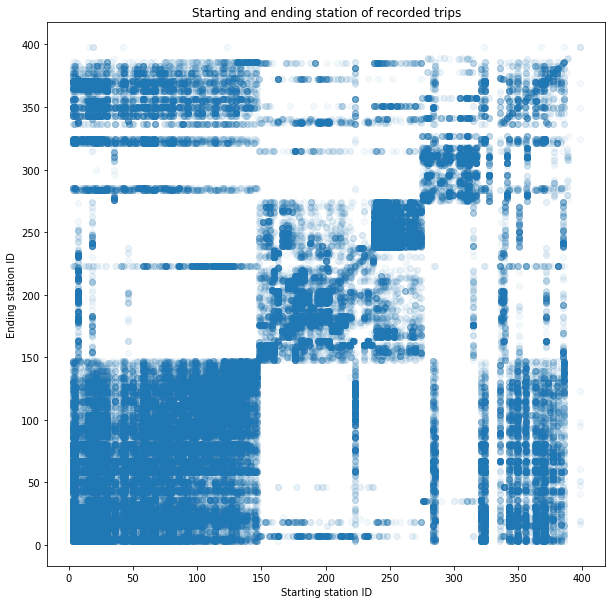

In [10]:
# investigate the connections between stations
plt.figure(figsize=(10,10))
plt.scatter(data = df, x = 'start_station_id', y = 'end_station_id', alpha= 1/20);
plt.xlabel('Starting station ID');
plt.ylabel('Ending station ID');
plt.title('Starting and ending station of recorded trips');

The data shows that there are some clusters of stations that are highly connected. E.g. stations with the ID between 0 and 150 and around 350 seem to be connected within each other. This means that a trip starting at one of these stations will probably end at a station within the cluster of stations. Probably this is due  the stations are located in a similar area. Especially stations around ID 250 seem to be highly connected with each other. Also interestingly some stations (e.g. around ID 325) have a high frequency and interconnection to other clusters of stations which makes them  potentialy interesting stations.

For a detailed understanding it is necessary to take a close look at the stations and their ID.

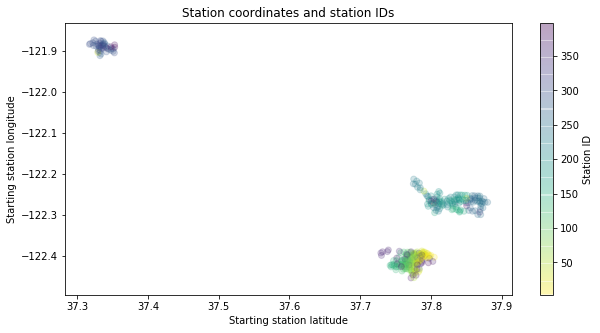

In [11]:
# investigate the stations in detatil based on their coordinates and station id

plt.figure(figsize=(10,5))
plt.scatter(data = df_stations_overview, x = 'start_station_latitude', y = 'start_station_longitude', c = 'station_id', cmap = 'viridis_r', alpha = 1/5)
plt.xlabel('Starting station latitude');
plt.ylabel('Starting station longitude');
plt.title('Station coordinates and station IDs');
plt.colorbar(label = 'Station ID');

So the clusters can be differentiated by their ID, with some noise in the data. This also explains the observation before that there is some interconnection between the different clusters. This could be explained as the IDs are not purely attached to the stations in a consecutive order.
With some additional research it shows that those three clusters represent San Jose (upper left), Oakland (right) and San Francisco (bottom). For deeper investigation it is necessary to look at each of the clusters seperately.

After identifiying three clusters of stations a detailed look provides more information about the usage frequency in those clusters.

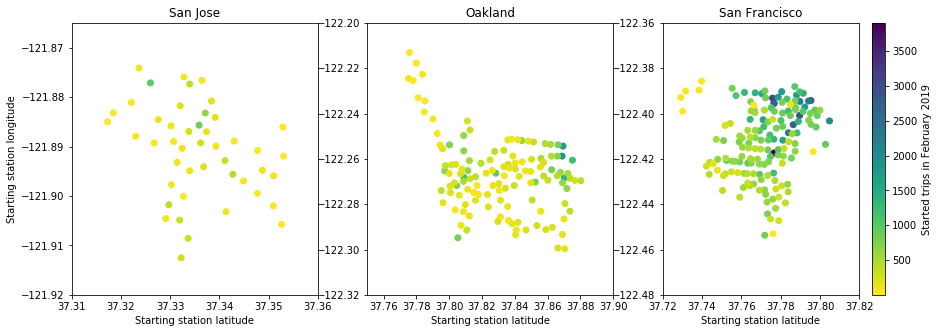

In [12]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
# San Jose
plt.scatter(data = df_stations_overview, x = 'start_station_latitude', y = 'start_station_longitude', c = 'start_counts', cmap = 'viridis_r')
plt.xlabel('Starting station latitude');
plt.ylabel('Starting station longitude');
plt.title('San Jose');
plt.xlim(37.31,37.36);
plt.ylim(-121.92,-121.865);

plt.subplot(1, 3, 2)
# Oakland

plt.scatter(data = df_stations_overview, x = 'start_station_latitude', y = 'start_station_longitude', c = 'start_counts', cmap = 'viridis_r')
plt.xlabel('Starting station latitude');
plt.title('Oakland');
plt.xlim(37.75,37.9)
plt.ylim(-122.32,-122.2)

plt.subplot(1, 3, 3)
# San Francisco
plt.scatter(data = df_stations_overview, x = 'start_station_latitude', y = 'start_station_longitude', c = 'start_counts', cmap = 'viridis_r')
plt.colorbar(label = 'Started trips in February 2019')
plt.xlabel('Starting station latitude');
plt.title('San Francisco');
plt.xlim(37.72,37.82);
plt.ylim(-122.48,-122.36);


This data visualization indicates the stations per clusters that are highly frequented. It can be seen that in San Francisco the stations have higher usage than in Oakland and Oakland has a higher usage than San Jose. Also with this information the service can identify important stations within a cluster that need more attention for improving the service.

##### Conclusions:
The goal of this analysis was to provide valuable information for a bike sharing service provider to ensure service quality and even improve the service. in the beginning we asked following questions:

* Are there stations that are highly frequented?
* Is there a pattern starting and ending points of trips regarding to some stations?
* Are some stations highly connected to each other?
* Is there a usage pattern depending on the day of the week or the hour of the day?
* Can user characteristica be identified that drive a special usage behavior?

The analysis shows that there is a high difference in the frequency in the use of stations. The data shows that stations are generally higher or lower frequented not depending on starting or ending a trip. With this in mind, stations can be identifyied that have a crucial role in the system. Furthermore clusters of stations can be identifyied that are highly connected to each other. In those clusters the visualizations show the stations that are from particular interest. For improving the service the provider should pay attention to those stations and ensure the availability of bikes. Also data shows a usage pattern of the service depening on the day of the week and time of the day. During the week the service is higher frequented as well as in the morning and afternoon hours. Finally users from type customers have a different usage behavior than subscribers by having a longer mean duration of the trips. All this information can be used to ensure the quality of the service by recognising potential bottlenecks in the service.